
# Measuring Performance in Python

In [3]:
import time

In [4]:
# This is a straight-forward version of FizzBuzz
def simpleFizzBuzz(number):
    if number % 15 == 0:
        return "FizzBuzz"
    elif  number % 5 == 0:
        return "Buzz"
    elif  number % 3 == 0:
        return "Fizz"
    else:
        return "--"

In [5]:
# This is a straight-forward version of FizzBuzz
def modBuzz(number):
    mod = number % 15
    if mod == 0 :
        return "FizzBuzz"
    elif mod in [3,6,9,12]:
        return "Fizz"
    elif mod in [5,10]:
        return "Buzz"
    else:
        return "--"

In [6]:
# This version of FizzBuzz uses a single array of 15 values to 
# return all possible outcomes, by using the remainder of 15 as
# the array index. This approach requires more preperation
def hashBuzz(n):
    return ['FizzBuzz', '--', '--', 'Fizz', '--', 'Buzz', 'Fizz', '--',
         '--', 'Fizz', 'Buzz', '--', 'Fizz', '--', '--'][n % 15]

In [7]:
# This is an interesting approach that relies on python syntax tricks.
# A True value has an arithmetic value of 1, so using that its possible
# to create a number corresponding to each possible outcomes 
# (2*(n%3==0) + (n%5==0))
# Will always output 0,1,2,3 -
# 0 = no match, 1 = multiple of 5, 2=multiple of 3, 3=multiple of 3 and 5
BUZZSET = ["--","Buzz","Fizz","FizzBuzz"]
def shortHashBuzz(n):
    return BUZZSET[(2*(n%3==0) + (n%5==0))]

In [107]:
# Use hashBuzz to generate a dict of all possible remainders of 15
# Then just use key-lookups
DB = {i: hashBuzz(i) for i in range(0,15)}
def dictBuzz(n):
    return DB[n % 15]
print(DB)

{0: 'FizzBuzz', 1: '--', 2: '--', 3: 'Fizz', 4: '--', 5: 'Buzz', 6: 'Fizz', 7: '--', 8: '--', 9: 'Fizz', 10: 'Buzz', 11: '--', 12: 'Fizz', 13: '--', 14: '--'}


In [9]:
# Use zip to make the dict of all possible return responses
# Use (2*(n%3==0) + (n%5==0)) to produce a 0,1,2, or 3
SDB = dict(zip(range(4), ["--","Buzz","Fizz","FizzBuzz"]))
def shortDictBuzz(n):
    return SDB[(2*(n%3==0) + (n%5==0))]
print(SDB)

{0: '--', 1: 'Buzz', 2: 'Fizz', 3: 'FizzBuzz'}


In [10]:
def dynamicFizzBuzz(n, triggerDict = {3:'Fizz', 5:'Buzz'}):
    """
    Expects a dict in the format of:
    """
    response = ""
    for key in triggerDict.keys():
        if n % key == 0:
            response += triggerDict[key]
    if response == "": response = "--"
    return response

In [90]:
class buzzClass:
    def __init__(self, triggerDict = {3:'Fizz', 5:'Buzz'}):
        self.triggerDict = triggerDict
        self.responseDict = {0:'--', 1:'Buzz', 2:'Fizz', 3:'FizzBuzz'}
        self.modDict = {0: 'FizzBuzz', 1: '--', 2: '--', 3: 'Fizz', 4: '--', 5: 'Buzz', 6: 'Fizz', 7: '--', 8: '--', 9: 'Fizz', 10: 'Buzz', 11: '--', 12: 'Fizz', 13: '--', 14: '--'}
    
    def dynamicFizzBuzz(self, n):
        """
        Expects a dict in the format of:
        """
        response = ""
        for key in self.triggerDict.keys():
            if n % key == 0:
                response += self.triggerDict[key]
        if response == "": response = "--"
        return response
    
    def fizzBuzz(self, n):
        return self.modDict[n % 15]
    
    def fizzBuzzCode(self, n):
        return self.responseDict[(2*(n%3==0) + (n%5==0))]

In [93]:
st = time.time_ns()
print(f"{'conditional function:': <30} {time.time_ns()-st:,}\n{[(i, simpleFizzBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'mod conditional:': <30} {time.time_ns()-st:,}\n{[(i, hashBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'list lookup:': <30} {time.time_ns()-st:,}\n{[(i, hashBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'short list lookup:': <30} {time.time_ns()-st:,}\n{[(i, shortHashBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'dict lookup:': <30} {time.time_ns()-st:,}\n{[(i, dictBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'short dict lookup:': <30} {time.time_ns()-st:,}\n{[(i, shortDictBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
print(f"{'dynamic fizzBuzz:': <30} {time.time_ns()-st:,}\n{[(i, dynamicFizzBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
fbc = buzzClass()
print(f"{'dynamic fizzBuzz class:': <30} {time.time_ns()-st:,}\n{[(i, fbc.dynamicFizzBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
fbc = buzzClass()
print(f"{'fizzBuzz class (dict lookup):': <30} {time.time_ns()-st:,}\n{[(i, fbc.fizzBuzz(i)) for i in range(1,16)]}\n\n")
st = time.time_ns()
fbc = buzzClass()
print(f"{'fizzBuzz class (code):': <30} {time.time_ns()-st:,}\n{[(i, fbc.fizzBuzzCode(i)) for i in range(1,16)]}\n\n")

conditional function:          83,000
[(1, '--'), (2, '--'), (3, 'Fizz'), (4, '--'), (5, 'Buzz'), (6, 'Fizz'), (7, '--'), (8, '--'), (9, 'Fizz'), (10, 'Buzz'), (11, '--'), (12, 'Fizz'), (13, '--'), (14, '--'), (15, 'FizzBuzz')]


mod conditional:               113,000
[(1, '--'), (2, '--'), (3, 'Fizz'), (4, '--'), (5, 'Buzz'), (6, 'Fizz'), (7, '--'), (8, '--'), (9, 'Fizz'), (10, 'Buzz'), (11, '--'), (12, 'Fizz'), (13, '--'), (14, '--'), (15, 'FizzBuzz')]


list lookup:                   119,000
[(1, '--'), (2, '--'), (3, 'Fizz'), (4, '--'), (5, 'Buzz'), (6, 'Fizz'), (7, '--'), (8, '--'), (9, 'Fizz'), (10, 'Buzz'), (11, '--'), (12, 'Fizz'), (13, '--'), (14, '--'), (15, 'FizzBuzz')]


short list lookup:             122,000
[(1, '--'), (2, '--'), (3, 'Fizz'), (4, '--'), (5, 'Buzz'), (6, 'Fizz'), (7, '--'), (8, '--'), (9, 'Fizz'), (10, 'Buzz'), (11, '--'), (12, 'Fizz'), (13, '--'), (14, '--'), (15, 'FizzBuzz')]


dict lookup:                   127,000
[(1, '--'), (2, '--'), (3, 'Fizz'), (4

<br>

## Measuring time

The `time` library uses the system clock (the CPU relies on accurate timing). To get the cpu time - the number of seconds since `1/1/1970` - the function call is `time()` - `time.time()` and the result is a float. <b>Floats</b> are not precise numbers. 
When timing very fast things it may be safer to use the `time_ns()` funciton which return a large integer - the time in nanoseconds since `1/1/1970`.


<b>Unix Time (<i>Epoch</i> of 1/1/1970) - </b>  https://en.wikipedia.org/wiki/Unix_time<br>
<b>Fractions of a second - </b> https://en.wikipedia.org/wiki/Second#SI_multiples<br>
<b>time.time() - </b> https://docs.python.org/3/library/time.html#time.time

In [14]:
import time

#The two useful functions to pull the current time
#(Display with their return value types)
# {n: <16} will pad n with whitespace on the right, up to 16 characters
# (simple way to align the number after it)
print(f"{str(type(time.time())): <16} {time.time()}")
print(f"{str(type(time.time_ns())): <16} {time.time_ns()}")
print()

<class 'float'>  1582501499.662029
<class 'int'>    1582501499662468000



In [15]:
#How do they evaluate when in a single statement
print(f"{time.time_ns()-time.time_ns(): >26,.19f} nanoseconds apart")
print(f"{time.time()-time.time(): >26,.19f} seconds apart")

-1,000.0000000000000000000 nanoseconds apart
     0.0000000000000000000 seconds apart


In [31]:
#How much time passes between consecutive statements
nst = time.time_ns()
print(f"{time.time_ns()-nst:,.2f} nanoseconds")

st = time.time()
print(f"{time.time()-st:,.15f} seconds")

43,000.00 nanoseconds
0.000092983245850 seconds


In [32]:
times = []
for i in range(0,100):
    st = time.time_ns()
    [(i, dictBuzz(i)) for i in range(0,100001)]
    times.append(time.time_ns()-st)

print(f"Total: {sum(times)/1000000000:,.8f} seconds")
print(f"Average: {(sum(times)/len(times))/1000000000:.8f} seconds")

Total: 3.52335900 seconds
Average: 0.03523359 seconds


To work with precise numbers (not floats - the python default) there is a library called `decimal` which has a function `Decimal()` that will cast a number with a high level of decimal-point precision. ex. (using the `math` library) `decimal.Decimal(math.sqrt(2)))` = `1.4142135623730951454746218587388284504413604736328125`

In [33]:
import decimal
import time

#This is *slow* relative to some operations
def decTime():
    return decimal.Decimal(time.time_ns()/1000000000)

#This results in the casting only happening once
def decTimeDelta(nsStartTime, nsEndTime):
    return decimal.Decimal((nsEndTime - nsStartTime)/1000000000)

print(time.time_ns())
print(decTime())
print(time.time())
print(decTimeDelta(time.time_ns(), time.time_ns()))

1582501819808731000
1582501819.8089339733123779296875
1582501819.80901
9.99999999999999954748111825886258685613938723690807819366455078125E-7


There is some weird behavior when dealing with events that are nearly simultaneous because floating numbers are not precise. 
Googling `9.99999999999999954748111825886258685613938723690807819366455078125E-7` has exact matches!
https://github.com/marshmallow-code/marshmallow/issues/105
<br><br>
Ok, so the <i>roll your own</i> approach has some interesting nuances, it would be nice if there was a library that handled them for us. 

In [35]:
import timeit

`timeit` is a python library that is useful for timing short-duration events and iterations of loops. The `timeit` function (`timeit.timeit()`) takes a function or operation as input, along with the number of times to test it, and returns the <b>total</b> duration in seconds. 

In [38]:
nTimes=100
print(f"""{(
            timeit.timeit('[(n, ["--","Buzz","Fizz","FizzBuzz"][(2*(n%3==0) + (n%5==0))]) for n in range(100001)]',
                           number=nTimes)
            /nTimes)*1000:.2f} milliseconds""")

37.01 milliseconds


Jupyter has a built-in feature called cell-magic. (Their name, not mine.)
There are certain keywords that are signified with `%%` that have special functions. One of them is `%%timeit` which will run the cells code 700,000 times by default, and report how long the operations averaged (and the standard deviation). The number of loops can be controlled with `-n`: `%%timeit -n 100` would do 7 runs of 100 loops each. 

In [81]:
%%timeit -n 1000 -r 100
[(i, simpleFizzBuzz(i)) for i in range(1,16)]

5.58 µs ± 1.8 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [83]:
%%timeit -n 1000 -r 100
[(i, hashBuzz(i)) for i in range(1,16)]

5.6 µs ± 2 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [78]:
%%timeit -n 1000 -r 100
[(i, shortHashBuzz(i)) for i in range(1,16)]

5.56 µs ± 1.54 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [79]:
%%timeit -n 1000 -r 100
[(i, dictBuzz(i)) for i in range(1,16)]

3.6 µs ± 752 ns per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [84]:
%%timeit -n 1000 -r 100
[(i, shortDictBuzz(i)) for i in range(1,16)]

5.67 µs ± 1.88 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


<br><br>There seems to be very little difference between the approaches when evaluating 1-15. Running it on 1-100000 should start to show the difference.

In [144]:
%%timeit -n 10
[(i, simpleFizzBuzz(i)) for i in range(1,100001)]

39.1 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [161]:
%%timeit -n 10
[(i, modBuzz(i)) for i in range(1,100001)]

38.6 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [441]:
%%timeit -n 10 -r 10
[(i, hashBuzz(i)) for i in range(1,100001)]

38.8 ms ± 2.71 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [442]:
%%timeit -n 100
[(i, shortHashBuzz(i)) for i in range(1,100001)]

41 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [443]:
%%timeit -n 100
[(i, dictBuzz(i)) for i in range(1,100001)]

30.2 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## ^ This looks like the winner

In [444]:
%%timeit -n 100
[(i, shortDictBuzz(i)) for i in range(1,100001)]

42.3 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [171]:
%%timeit -n 100
[(i, dynamicFizzBuzz(i)) for i in range(1,100001)]

68.1 ms ± 7.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [403]:
%%timeit -n 10
[(i, dynamicFizzBuzz(i,  {3:'Fizz', 5:'Buzz', 7:'Bazz'} )) for i in range(1,100001)]

103 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [85]:
fbc = buzzClass()

In [86]:
%%timeit -n 10
[(i, fbc.dynamicFizzBuzz(i)) for i in range(1,100001)]

62.8 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
fbc = buzzClass({3:'Fizz', 5:'Buzz', 7:'Bazz'})

In [88]:
%%timeit -n 10
[(i, fbc.dynamicFizzBuzz(i)) for i in range(1,100001)]

71.8 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [95]:
%%timeit -n 10
[(i, fbc.fizzBuzz(i)) for i in range(1,100001)]

34.4 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The class version `buzzClass.fuzzBuzz()` uses a cached version of the trigger list stored as a dict. This makes it very similar to the non-class version `dictBuzz()`.

If you made it this far, you deserve a present. Here's the only kind of present I can give you, a confusing python function. <br>
The next cell shows the benchmark for the dynamic version - that could take new trigger list. <br>{3:'Fizz', 5:'Buzz', 7:'Bazz'} is commonly used.<br>
The benchmark time is about 75ms for 3 triggers.

In [96]:
%%timeit -n 100
fbc = buzzClass({3:'Fizz', 5:'Buzz', 7:'Bazz'})
[(i, fbc.dynamicFizzBuzz(i)) for i in range(0,100001)]

74.7 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


When the class is initated, it caches its trigger list as a dict of all possible modulos. <br>
`{0: 'FizzBuzzBazz',
 1: '',
 2: '',
 3: 'Fizz',
 4: '',
 5: 'Buzz',
 6: 'Fizz',
 7: 'Bazz',
 8: '', ...
 <3*5*7>: 'FizzBuzzBazz}`<br>
 Then the function can be called to reuse it: `dynamicBuzz.checkNum()`

In [367]:
class dynamicBuzz:
    def __init__(self, triggerDict={3:'Fizz', 5:'Buzz', 7:'Bazz'}):
        self.maxMultiple = 1
        for k in triggerDict:
            self.maxMultiple *= k
        self.dynamicDict = {n: "".join([triggerDict[k]*(n % k == 0) for k in triggerDict ]) for n in range(self.maxMultiple+1)}
        self.dynamicList = ["".join([triggerDict[k]*(n % k == 0) for k in triggerDict ]) for n in range(self.maxMultiple+1)]
    
    def checkNum(self, n):
        return self.dynamicDict[n % self.maxMultiple] or "--"
    
    def checkNumList(self, n):
        return self.dynamicList[n % self.maxMultiple] or "--"
    

In [118]:
%%timeit
db=dynamicBuzz()

In [119]:
%%timeit -n 100 -r 10
[(i, db.checkNum(i)) for i in range(1,100001)]

40 ms ± 1.56 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


That's <b>fast</b>, let's see how quick it is with the regular version

In [184]:
db = dynamicBuzz({3:'Fizz', 5:'Buzz'})

In [121]:
%%timeit -n 100 -r 10
[(i, db.checkNum(i)) for i in range(1,100001)]

39.5 ms ± 2.19 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


# That's a win! 
### ~40 ms for a dynamic version compared to ~30 ms for the fastest static

In [108]:
%%timeit -n 100 -r 10
[(i, dictBuzz(i)) for i in range(1,100001)]

27.9 ms ± 2.24 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


Lets tripple the number of triggers and see what kind of penalty we take.

In [430]:
%%timeit -n 10 -r 10
[(i, db.checkNum(i)) for i in range(1,100001)]

52.4 ms ± 11.1 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


Makes sense if we look at the size of the lookup dict.

In [436]:
%%timeit -n 1 -r 1
db = dynamicBuzz({  3: 'Fizz', 
                    5: 'Buzz', 
                    7: 'Bazz', 
                    8: 'Pop', 
                    9: 'Pow', 
                    13: 'Wow',
                    17: 'Zoom'})
print(len(db.dynamicDict))
#db.dynamicDict

1670761
6.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now that all the processing is cached (which was slow), the use of that data is very fast.

In [439]:
%%timeit -n 10 -r 10
[(i, db.checkNum(i)) for i in range(1,100001)]

55.8 ms ± 12 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


At that size a list lookup is about the same speed.

In [440]:
%%timeit -n 10 -r 10
[(i, db.checkNumList(i)) for i in range(1,100001)]

48.7 ms ± 9.36 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## We may still be able to do better with parallel processing... 

In [441]:
from multiprocessing import Pool
db = dynamicBuzz({3:'Fizz', 5:'Buzz'})

In [371]:
fbPool = Pool(4)
print([r for r in enumerate(fbPool.map(db.checkNum, range(0,15)))])
fbPool.close()

[(0, 'FizzBuzz'), (1, '--'), (2, '--'), (3, 'Fizz'), (4, '--'), (5, 'Buzz'), (6, 'Fizz'), (7, '--'), (8, '--'), (9, 'Fizz'), (10, 'Buzz'), (11, '--'), (12, 'Fizz'), (13, '--'), (14, '--')]


In [188]:
%%timeit -n 100 -r 10
fbPool = Pool(2)
[r for r in enumerate(fbPool.map(db.checkNum, range(0,100001)))]
fbPool.close()

67.8 ms ± 5.25 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


There's some overhead in allocating the pool, and converting the output. 
Let's reuse the `Pool` and take out the output formatting. 

In [442]:
fbPool = Pool(2)
db = dynamicBuzz({3:'Fizz', 5:'Buzz'})

In [443]:
%%timeit -n 100 -r 10
[fbPool.map(db.checkNum, range(0,100001))]

26.3 ms ± 2.16 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


That's the fastest yet. The `Pool` size should be dictated by the number of physical cores in your CPU.

In [444]:
fbPool.close()

In [181]:
fbPool = Pool(2)

#### Now that we know we can get the dynamic version down to ~25ms, let's see how fast the static function runs

In [182]:
%%timeit -n 100 -r 10
[fbPool.map(dictBuzz, range(0,100001))]

18.9 ms ± 1.77 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [220]:
fbPool.close()

Since I loved the logic beind the static version of this approach I wanted to make it dynamic. It should scale up with the number of trigger terms better. 

This scales well because no matter how many terms are added, the response list grows linerarly. 
This approach uses base 2 (binary) to flag the presence of a trigger (`complicatedBuzzing.responses` is in the format `{0:'Fizz', 1:'Buzz',2:'Bazz',...}` ordered by their multiple trigger). `complicatedBuzzing.binBuzz()` takes a single integer, and iterates through all the multiples (`complicatedBuzzing.mods`) and if the modulo is 0 then 2<sup>k</sup> will be added to the total. Here are the first 17 integers with their summed([2<sup>multiple divisor</sup>]) values. <br>
{0: 'Fizz', 1: 'Buzz', 2: 'Bazz', 3: 'Pop', 4: 'Pow', 5: 'Wow', 6: 'Zoom'}
-> [2<sup>0</sup>, 2<sup>1</sup>, 2<sup>2</sup>, 2<sup>3</sup>, 2<sup>4</sup>, 2<sup>5</sup>, 2<sup>6</sup>] <br>
`Integer EncodedValue  Triggered Response`<br>
`0       127           FizzBuzzBazzPopPowWowZoom`<br>
`3       1             Fizz`<br>
`5       2             Buzz`<br>
`6       1             Fizz`<br>
`7       4             Bazz`<br>
`8       8             Pop`<br>
`9       17            FizzPow`<br>
`10      2             Buzz`<br>
`12      1             Fizz`<br>
`13      32            Wow`<br>
`14      4             Bazz`<br>
`15      3             FizzBuzz`<br>
`16      8             Pop`<br>
`17      64            Zoom`<br>
If we continued this, 51, for example, a multiple of 3 (2<sup>0</sup>=1) and 17 (2<sup>6</sup>=64) -> 1 + 64 = 65.<br>
0 and 1,670,760 both have no remainder of 3,5,7,9,13, and 17. <br>
0 and 1,670,760 would have all <i>flags</i> set -> 2<sup>0</sup> + 2<sup>1</sup> + 2<sup>2</sup> + 2<sup>3</sup> + 2<sup>4</sup> + 2<sup>5</sup> + 2<sup>6</sup> = 127 


Once the number's response is encoded it is converted into binary: 1= 0001, 2=0010, 127=1111111<br>
Then it's broken apart:<br>
127 = ['1','1','1','1','1','1','1'], <b>reversed</b>, and matched up to the responses<br>
['Fizz', 'Buzz', 'Bazz', 'Pop', 'Pow', 'Wow', 'Zoom']<br>
so (already reversed) ['0','1','0','1','0','1','0'] would output `['Buzz', 'Pop', 'Wow']` which is then joined together with no spaces. If the result is 0 characters in length, `--` is returned instead. 

In [423]:
class complicatedBuzzing():
    def __init__(self, triggers={3: 'Buzz', 5: 'Fizz', 7: 'Bazz'}):
        self.triggers = triggers
        self.mods = list(self.triggers.keys())
        self.mods.sort()
        self.responses = {i:self.triggers[k] for i, k in enumerate(self.mods)}
        
    def lookupBits(self, i):
        return "".join([self.responses[i]*int(bit) for i, bit in enumerate(bin(i)[:1:-1])]) or "--"
        
    def binBuzz(self, n):
        return self.lookupBits(sum([(2**k)*(n%m==0) for k, m in enumerate(self.mods)]))

    
    #This is just used to print out the binary encoding of the number series
    def buzzBits(self, lim):
        for n in range(lim):
            s = sum([(2**k)*(n%m==0) for k, m in enumerate(self.mods)])
            if s>0:
                print(n, s, self.binBuzz(n))

In [447]:
%%timeit -n 5 -r 2
r = complicatedBuzzing({3: 'Fizz', 
                        5: 'Buzz', 
                        7: 'Bazz', 
                        8: 'Pop', 
                        9: 'Pow', 
                        13: 'Wow',
                        17: 'Zoom'})

4.01 µs ± 1.13 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [446]:
[(i, r.binBuzz(i)) for i in range(1,18)]

[(1, '--'),
 (2, '--'),
 (3, 'Fizz'),
 (4, '--'),
 (5, 'Buzz'),
 (6, 'Fizz'),
 (7, 'Bazz'),
 (8, 'Pop'),
 (9, 'FizzPow'),
 (10, 'Buzz'),
 (11, '--'),
 (12, 'Fizz'),
 (13, 'Wow'),
 (14, 'Bazz'),
 (15, 'FizzBuzz'),
 (16, 'Pop'),
 (17, 'Zoom')]

In [399]:
%%timeit -n 10 -r 5
[(i, r.binBuzz(i)) for i in range(1,100001)]

618 ms ± 26.1 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


Thats 89.5% faster than 6 seconds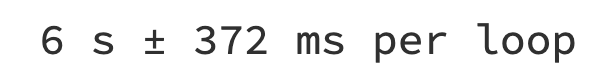

Ok if you actually made it this far, go outside. 

What? You really want a summary? 
If we cache all results, and limit conversions, then simple lookups can be done very quickly. If there would be a lot of data to cache, sometimes its not worth it. It depends how much the data will be re-used. 
The takeaway is that it is important to know the requirements - if there are not many edge cases it's easier to optimize. 